<div>
    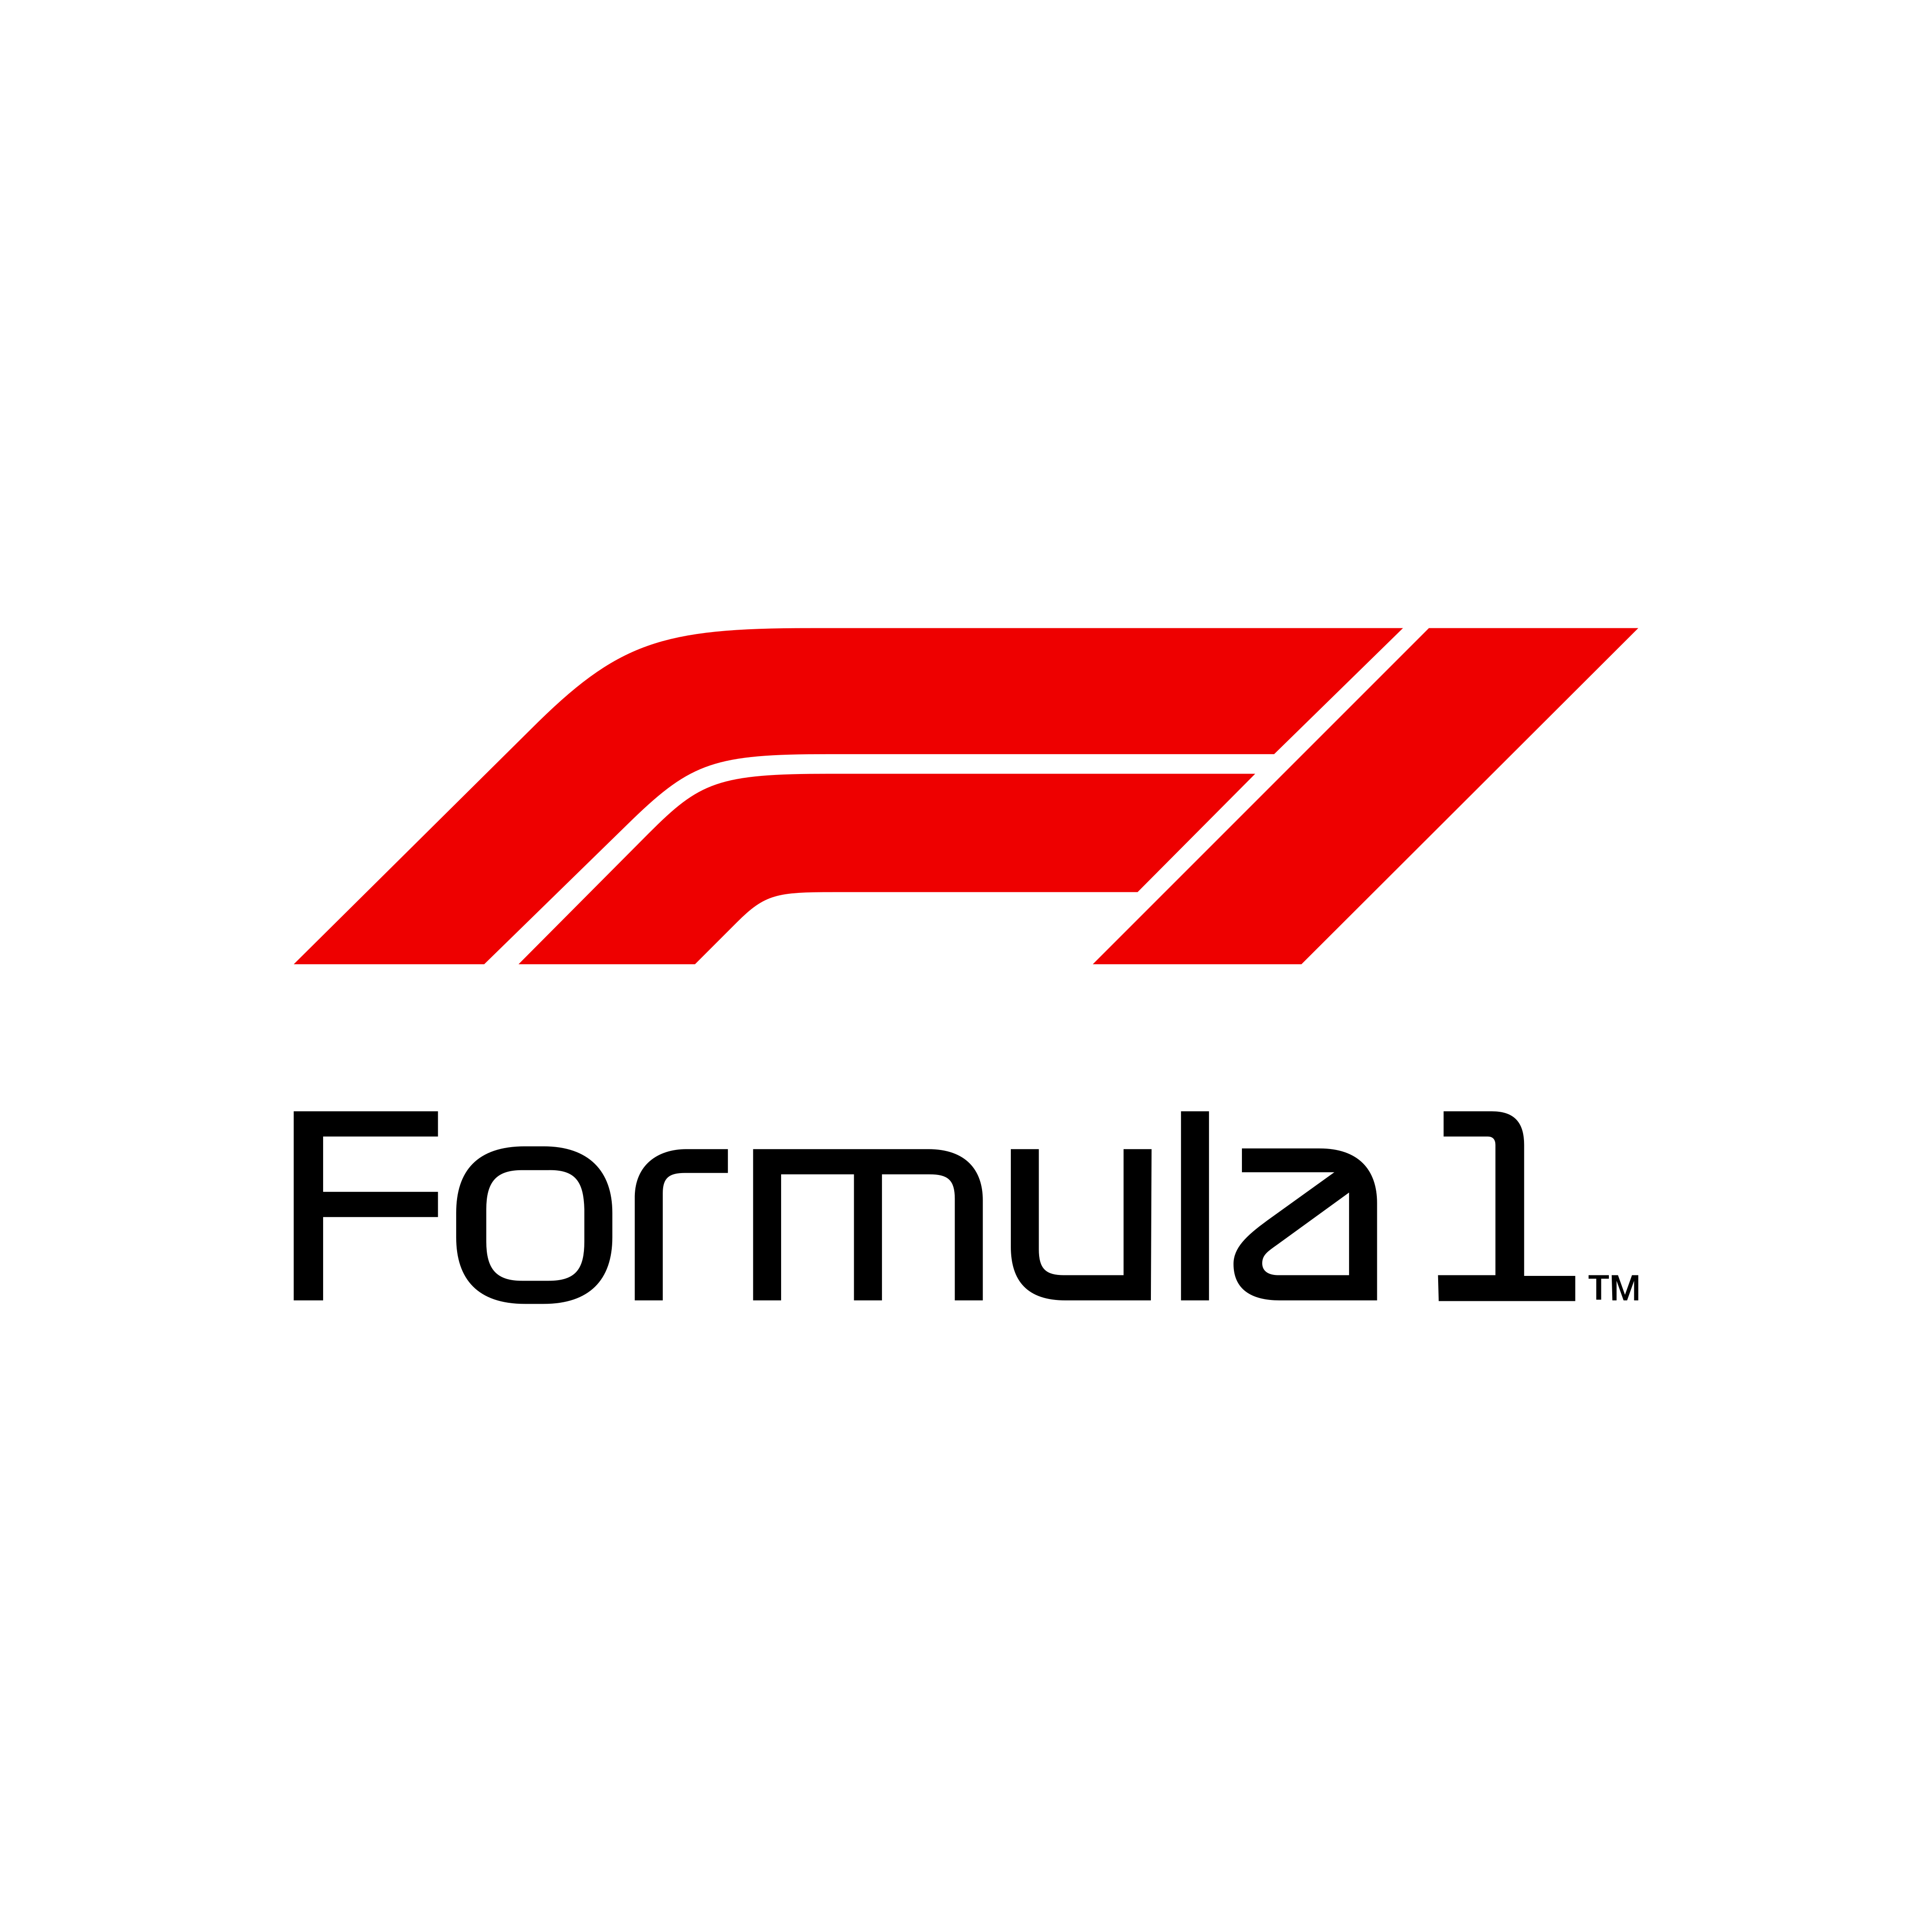
</div>

# Exploratory Data Analysis of Formula 1 Data

# About Dataset

# Context

Formula 1 (a.k.a. F1 or Formula One) is the highest class of single-seater auto racing sanctioned by the Fédération Internationale de l'Automobile (FIA) and owned by the Formula One Group. The FIA Formula One World Championship has been one of the premier forms of racing around the world since its inaugural season in 1950. The word "formula" in the name refers to the set of rules to which all participants' cars must conform. A Formula One season consists of a series of races, known as Grands Prix, which take place worldwide on purpose-built circuits and on public roads.

# Content

The dataset consists of all information on the Formula 1 races, drivers, constructors, qualifying, circuits, lap times, pit stops, championships from 1950 till the latest 2023 season.

# Acknowledgements

The data is compiled from http://ergast.com/mrd/

With the amount of data being captured, analyzed and used to design, build and drive the Formula 1 cars is astounding. It is a global sport being followed by millions of people worldwide and it is very fascinating to see drivers pushing their limit in these vehicles to become the fastest racers in the world!


In [109]:
# List all the files in the folder

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data viz
import os
for dirname, _, filenames in os.walk('/Users/shashankhegde/Desktop/F1_Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/shashankhegde/Desktop/F1_Data/circuits.csv
/Users/shashankhegde/Desktop/F1_Data/.DS_Store
/Users/shashankhegde/Desktop/F1_Data/status.csv
/Users/shashankhegde/Desktop/F1_Data/lap_times.csv
/Users/shashankhegde/Desktop/F1_Data/sprint_results.csv
/Users/shashankhegde/Desktop/F1_Data/formula-1-logo.png
/Users/shashankhegde/Desktop/F1_Data/drivers.csv
/Users/shashankhegde/Desktop/F1_Data/races.csv
/Users/shashankhegde/Desktop/F1_Data/constructors.csv
/Users/shashankhegde/Desktop/F1_Data/constructor_standings.csv
/Users/shashankhegde/Desktop/F1_Data/F1_data_exploratory_analysis.ipynb
/Users/shashankhegde/Desktop/F1_Data/qualifying.csv
/Users/shashankhegde/Desktop/F1_Data/driver_standings.csv
/Users/shashankhegde/Desktop/F1_Data/constructor_results.csv
/Users/shashankhegde/Desktop/F1_Data/pit_stops.csv
/Users/shashankhegde/Desktop/F1_Data/seasons.csv
/Users/shashankhegde/Desktop/F1_Data/results.csv
/Users/shashankhegde/Desktop/F1_Data/.ipynb_checkpoints/F1_data_exploratory_analysis-ch

In [43]:
# Manually create DataFrame for each csv file in the folder.

#circuits_df = pd.read_csv("/Users/shashankhegde/Desktop/F1_Data/circuits.csv")
#results_df = pd.read_csv("/Users/shashankhegde/Desktop/F1_Data/results.csv")
#drivers_df = pd.read_csv("/Users/shashankhegde/Desktop/F1_Data/drivers.csv")
#races_df = pd.read_csv("/Users/shashankhegde/Desktop/F1_Data/races.csv")


# Above approach of manual DataFrame creation is inefficient. Hence, lets automate the same in following steps.

# Below code lists all the files in the folder, reads each csv file in the folder, creates DataFrames for each csv file read in the folder with _df suffix.

In [137]:
# Lists all the files in the folder
# Creates a list of dataframes
# Read each csv file, create a dataframe with name of the DataFrame = sourcefile_df

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
import plotly.graph_objects as go
import plotly.express as px

import datetime 

# Set the folder path containing the CSV files
folder_path = '/Users/shashankhegde/Desktop/F1_Data'

# Create a list of DataFrames
dataframes = []

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Iterate over each CSV file and load it into a separate DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df_name = os.path.splitext(csv_file)[0] + '_df'  # DataFrame name in the format 'sourcefile_df'
    
    globals()[df_name] = pd.read_csv(file_path)
    dataframes.append(df_name)
    #Add the DataFrame to the list of DataFrames
    #dataframes.append(df_name)
    #print(dataframes)

    #Print the loaded DataFrame for verification
    print(f"Loaded {csv_file} into DataFrame: {df_name}")

Loaded circuits.csv into DataFrame: circuits_df
Loaded status.csv into DataFrame: status_df
Loaded lap_times.csv into DataFrame: lap_times_df
Loaded sprint_results.csv into DataFrame: sprint_results_df
Loaded drivers.csv into DataFrame: drivers_df
Loaded races.csv into DataFrame: races_df
Loaded constructors.csv into DataFrame: constructors_df
Loaded constructor_standings.csv into DataFrame: constructor_standings_df
Loaded qualifying.csv into DataFrame: qualifying_df
Loaded driver_standings.csv into DataFrame: driver_standings_df
Loaded constructor_results.csv into DataFrame: constructor_results_df
Loaded pit_stops.csv into DataFrame: pit_stops_df
Loaded seasons.csv into DataFrame: seasons_df
Loaded results.csv into DataFrame: results_df


In [98]:
#List of all the DataFreames we created in previous step

tables_df = pd.DataFrame(dataframes, columns =['DataFrame Name'])
tables_df

,DataFrame Name
0,circuits_df
1,status_df
2,lap_times_df
3,sprint_results_df
4,drivers_df
5,races_df
6,constructors_df
7,constructor_standings_df
8,qualifying_df
9,driver_standings_df


#Alternate approach to read the files, load each csv file into dataframe.

import pandas as pd
import os

# Get the path to the folder
path = '/Users/shashankhegde/Desktop/F1_Data'

# Get a list of all the files in the folder
files = os.listdir(path)

# Create a list of DataFrames
dataframes = []

# Loop over the files in the folder
for file in files:

    # If the file is a CSV file
    if file.endswith('.csv'):

        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(path, file))

        # Name the DataFrame as the source CSV file with the _df suffix
        df.name = file.replace('.csv', '_df')

        # Add the DataFrame to the list of DataFrames
        dataframes.append(df)

# Print the list of DataFrames
print(dataframes)

In [124]:
#constructor_results_df.set_index('constructorId').join(constructors_df.set_index('constructorId'))

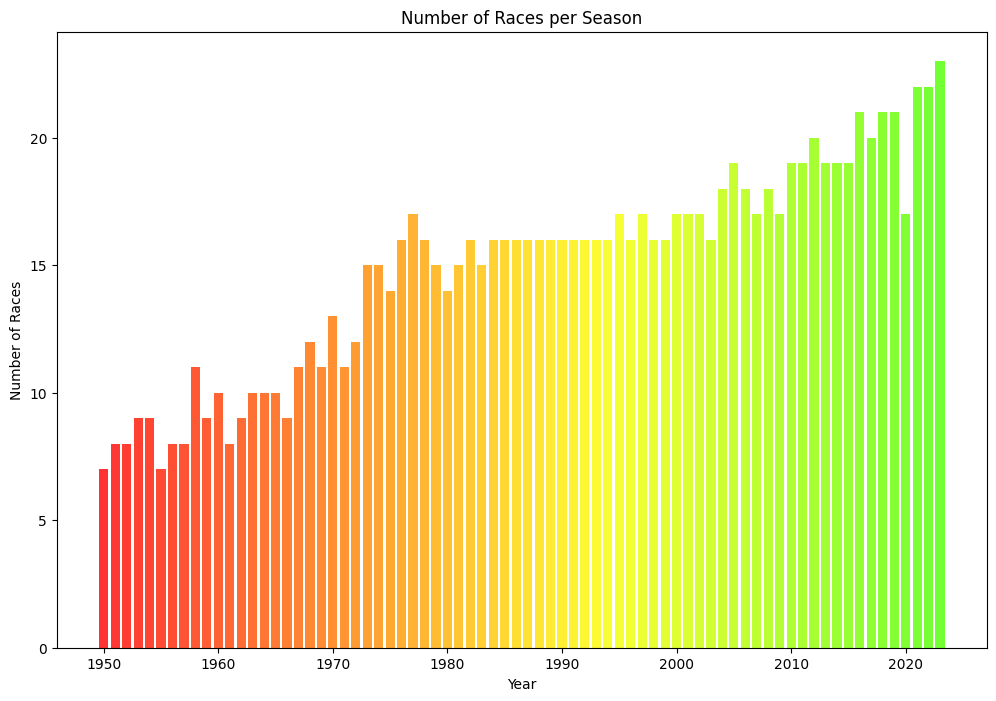

In [112]:
# Number of Races per Season

races_per_season = races_df.groupby('year')['raceId'].nunique()
plt.figure(figsize=(12, 8))
colors = plt.cm.hsv(range(len(races_per_season)))
plt.bar(races_per_season.index, races_per_season.values, color=colors, alpha=0.8, )

plt.title('Number of Races per Season')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.show()

In [123]:
# Top 10 Driver Nationality since 1950

driver_nationality = drivers_df.groupby('nationality')['nationality'].count().sort_values(ascending = False).reset_index(name = 'number of drivers')
fig = go.Figure(data=[go.Pie(labels=driver_nationality.nationality.head(10), values=driver_nationality['number of drivers'])])
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(
    title="Top 10 nationality since 1950")
fig.show()

In [126]:
# Who won the most races in each season? (does not includes drivers who was disqualified or penalized)

winner_df = pd.merge(races_df, results_df, on='raceId')
winner_df.head()

,raceId,year,round,circuitId,name,date,time_x,url,fp1_date,fp1_time,...,positionOrder,points,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,1,10.0,58,1:34:15.784,5655784,17,3,1:28.020,216.891,1
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,2,8.0,58,+0.807,5656591,43,14,1:29.066,214.344,1
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,3,6.0,58,+1.604,5657388,50,10,1:28.916,214.706,1
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,4,5.0,58,+4.435,5660219,53,6,1:28.416,215.920,1
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,5,4.0,58,+4.879,5660663,53,9,1:28.712,215.199,1


In [128]:
# Filtering for completed races only
completed_races_df = winner_df[winner_df['statusId'] == 1]
completed_races_df.head()

,raceId,year,round,circuitId,name,date,time_x,url,fp1_date,fp1_time,...,positionOrder,points,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,1,10.0,58,1:34:15.784,5655784,17,3,1:28.020,216.891,1
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,2,8.0,58,+0.807,5656591,43,14,1:29.066,214.344,1
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,3,6.0,58,+1.604,5657388,50,10,1:28.916,214.706,1
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,4,5.0,58,+4.435,5660219,53,6,1:28.416,215.920,1
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,5,4.0,58,+4.879,5660663,53,9,1:28.712,215.199,1


In [132]:
# grouping by season and driver, count the number of wins
wins_by_season_driver_df = completed_races_df.groupby(['year', 'driverId'])['positionOrder'].apply(lambda x: (x == 1).sum()).reset_index(name='wins')
wins_by_season_driver_df

,year,driverId,wins
0,1950,579,3
1,1950,593,1
2,1950,627,0
3,1950,642,3
4,1950,647,0
...,...,...,...
1358,2022,849,0
1359,2022,852,0
1360,2022,854,0
1361,2022,855,0


In [134]:
# Finding the driver with the most wins in each season
index = wins_by_season_driver_df.groupby(['year'])['wins'].transform(max) == wins_by_season_driver_df['wins']
most_wins_by_season_df = wins_by_season_driver_df[index].reset_index(drop=True)
most_wins_by_season_df

,year,driverId,wins
0,1950,579,3
1,1950,642,3
2,1951,579,3
3,1952,647,6
4,1953,647,5
...,...,...,...
84,2018,1,11
85,2019,1,11
86,2020,1,11
87,2021,830,10


In [135]:
# Joining with the drivers dataset to get the driver names
most_wins_by_season_df = pd.merge(most_wins_by_season_df, drivers_df[['driverId', 'forename', 'surname']], on='driverId')

# Printing the results
print(most_wins_by_season_df[['year', 'forename', 'surname', 'wins']])

    year forename     surname  wins
0   1950     Juan      Fangio     3
1   1951     Juan      Fangio     3
2   1954     Juan      Fangio     6
3   1955     Juan      Fangio     4
4   1956     Juan      Fangio     3
..   ...      ...         ...   ...
84  2018    Lewis    Hamilton    11
85  2019    Lewis    Hamilton    11
86  2020    Lewis    Hamilton    11
87  2021      Max  Verstappen    10
88  2022      Max  Verstappen    15

[89 rows x 4 columns]


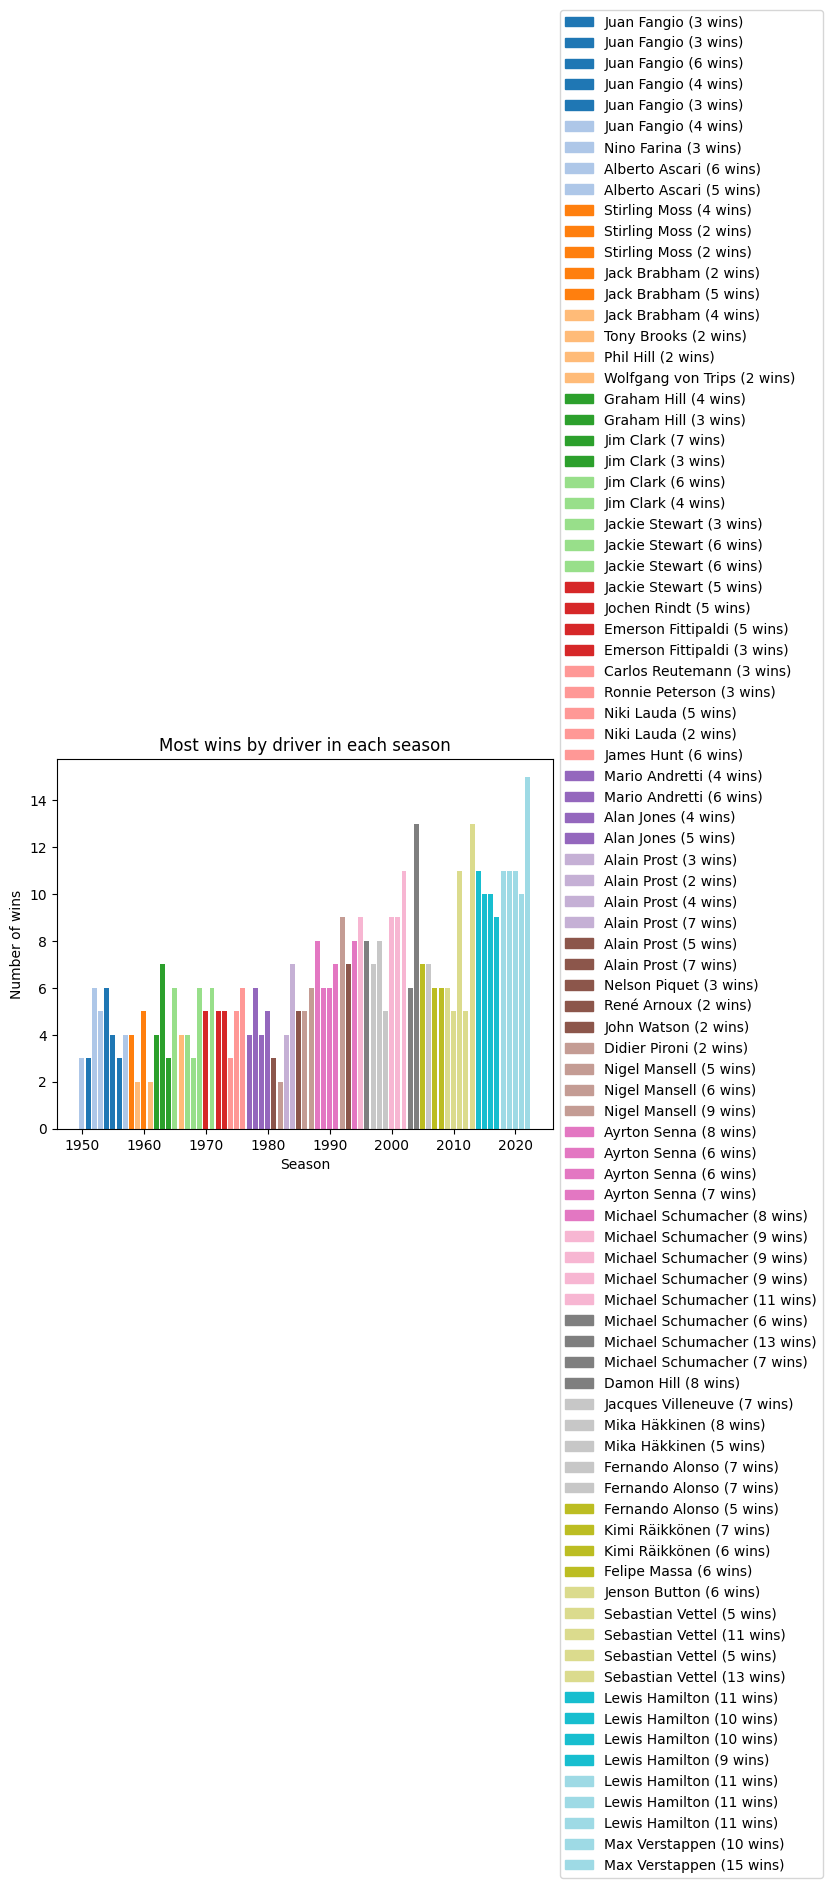

In [143]:
# creating a bar chart with different color for each driver
colors = plt.cm.tab20(np.linspace(0, 1, len(most_wins_by_season_df)))
plt.bar(most_wins_by_season_df['year'], most_wins_by_season_df['wins'], color=colors)

# setting the title and axis labels
plt.title('Most wins by driver in each season')
plt.xlabel('Season')
plt.ylabel('Number of wins')


# setting the tick labels to show the season (year number) vertically
labels = []
for index, row in most_wins_by_season_df.iterrows():
    labels.append('\n'.join(list(str(row['year']))))
#ax = sns.barplot((x=most_wins_by_season_df['year'], y=top_10.values))

ax.set_xticks(most_wins_by_season_df['year'])
ax.set_xticklabels(labels)

# adding a legend with driver names and number of wins
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(most_wins_by_season_df))]
labels = []
for index, row in most_wins_by_season_df.iterrows():
    driver_name = drivers_df.loc[drivers_df['driverId'] == row['driverId'], 'forename'].item() + ' ' + drivers_df.loc[drivers_df['driverId'] == row['driverId'], 'surname'].item()
    labels.append(driver_name + ' (' + str(row['wins']) + ' wins)')

plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# show the plot

In [144]:
#most popular circuts in order
counts = races_df['name'].value_counts()
circuits_pop = pd.DataFrame({'circuitId': counts.index, 'number of times': counts.values})
circuits_pop

,circuitId,number of times
0,Italian Grand Prix,74
1,British Grand Prix,74
2,Monaco Grand Prix,69
3,Belgian Grand Prix,68
4,German Grand Prix,64
5,French Grand Prix,62
6,Spanish Grand Prix,53
7,Canadian Grand Prix,52
8,Brazilian Grand Prix,48
9,United States Grand Prix,44


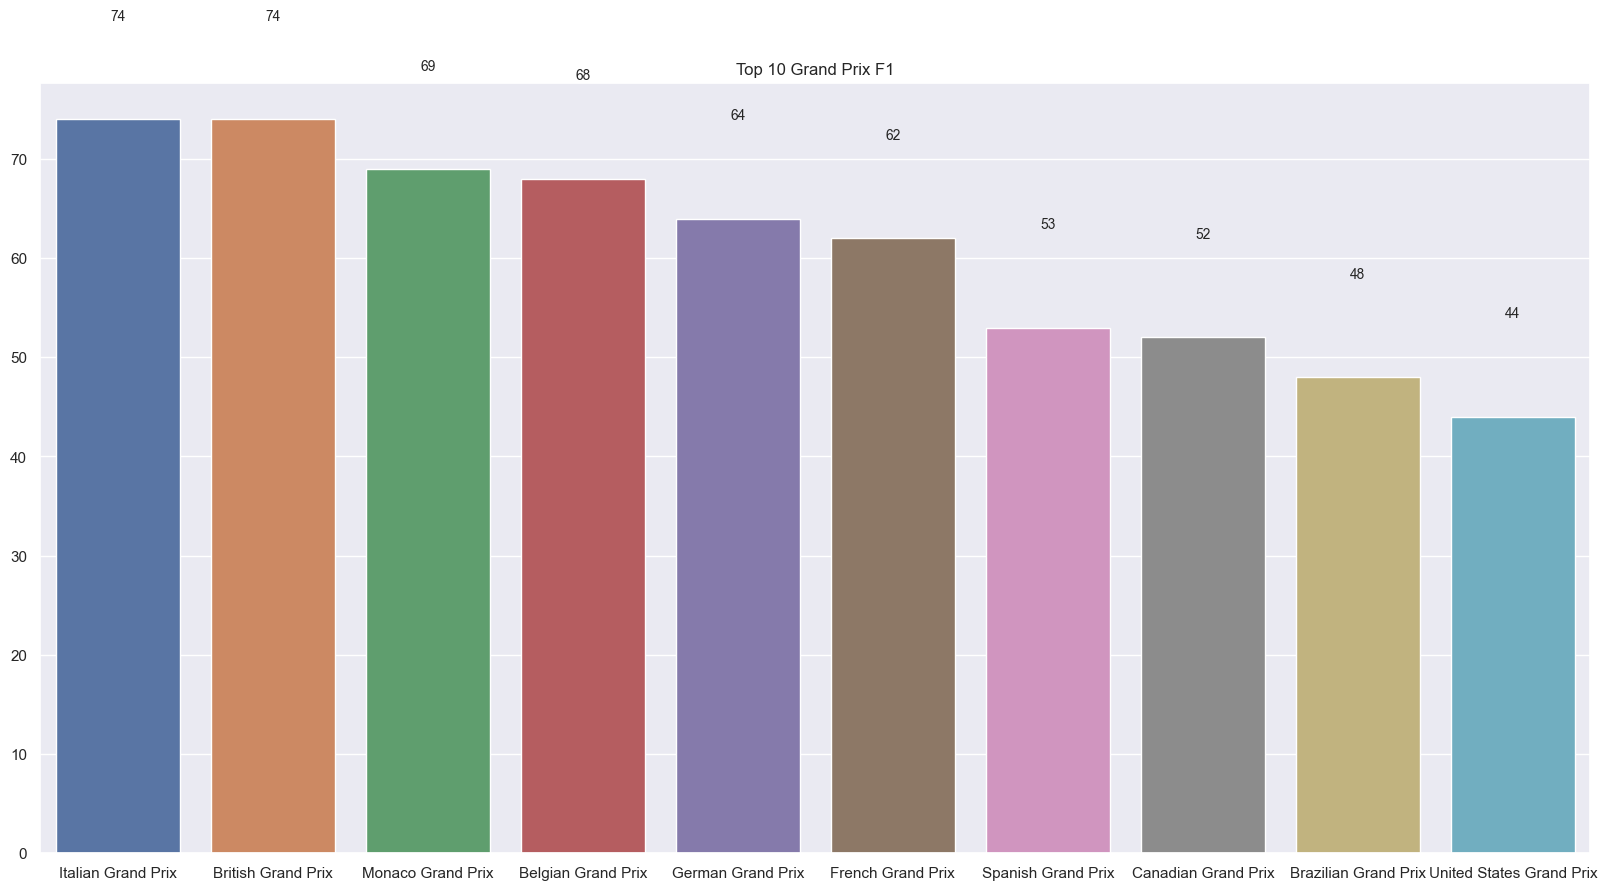

In [169]:
# Top 10 Grand Prix F1
top_10 = races_df['name'].value_counts()[:10]

sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=top_10.index, y=top_10.values)
ax.set_title("Top 10 Grand Prix F1")


for i, v in enumerate(top_10):
    ax.text(i, v + 10, str(v), ha='center', fontsize=10)

plt.show()